<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-learning-dataset" data-toc-modified-id="Loading-the-learning-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the learning dataset</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerical Features</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Object-Features" data-toc-modified-id="Object-Features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Object Features</a></span></li><li><span><a href="#Date-features" data-toc-modified-id="Date-features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Date features</a></span></li></ul></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning</a></span><ul class="toc-item"><li><span><a href="#Binary-features" data-toc-modified-id="Binary-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Binary features</a></span></li><li><span><a href="#Dates" data-toc-modified-id="Dates-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dates</a></span></li><li><span><a href="#Categories" data-toc-modified-id="Categories-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Categories</a></span><ul class="toc-item"><li><span><a href="#Treating-multibyte-features,-OSOURCE-and-TCODE:" data-toc-modified-id="Treating-multibyte-features,-OSOURCE-and-TCODE:-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Treating multibyte features, OSOURCE and TCODE:</a></span></li><li><span><a href="#Ordinal-features" data-toc-modified-id="Ordinal-features-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Ordinal features</a></span></li></ul></li></ul></li><li><span><a href="#Actual-EDA" data-toc-modified-id="Actual-EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Actual EDA</a></span><ul class="toc-item"><li><span><a href="#Socio-economic-environment-and-label" data-toc-modified-id="Socio-economic-environment-and-label-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Socio-economic environment and label</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Correlations-between-numerical-features,-excluding-US-census-data" data-toc-modified-id="Correlations-between-numerical-features,-excluding-US-census-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Correlations between numerical features, excluding US census data</a></span></li><li><span><a href="#Promotion-history-correlations" data-toc-modified-id="Promotion-history-correlations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Promotion history correlations</a></span></li><li><span><a href="#Giving-history-correlations" data-toc-modified-id="Giving-history-correlations-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Giving history correlations</a></span></li><li><span><a href="#Puttting-donors-on-a-map" data-toc-modified-id="Puttting-donors-on-a-map-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Puttting donors on a map</a></span></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Categorical features</a></span></li><li><span><a href="#The-US-census-data" data-toc-modified-id="The-US-census-data-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>The US census data</a></span></li><li><span><a href="#Income,-Wealth-and-donations" data-toc-modified-id="Income,-Wealth-and-donations-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Income, Wealth and donations</a></span></li><li><span><a href="#Some-promising-fetures-and-their-impact-on-the-label" data-toc-modified-id="Some-promising-fetures-and-their-impact-on-the-label-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Some promising fetures and their impact on the label</a></span></li><li><span><a href="#Boruta" data-toc-modified-id="Boruta-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Boruta</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis
This notebook contains all code for the prelimiatory analysis of the KDD Cup 98 datasets

In [1]:
%load_ext autoreload

In [2]:
# Set up logging and graphics defaults
%run ./common_init.ipynb

Setup logging to file: out.log
Figure output directory saved in figure_output at /home/datarian/OneDrive/unine/Master_Thesis/figures


In [3]:
%autoreload 2

import kdd98.data_loader as dl
import kdd98.utils_transformer as ut
from kdd98.transformers import *

# Where to save the figures
IMAGES_PATH = pathlib.Path(figure_output/'eda')

pathlib.Path(IMAGES_PATH).mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = pathlib.Path(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the learning dataset


Set working directory to main code folder

In [4]:
data_loader = dl.KDD98DataLoader("cup98LRN.txt", pull_stored=False)
learning = data_loader.clean_data

## Actual EDA

A look at the label (amount donated in US dollars)

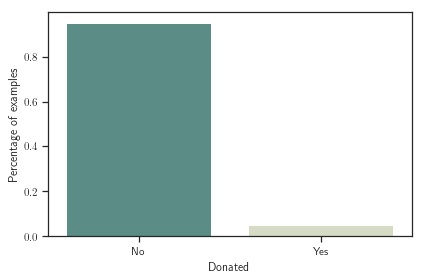

In [8]:
%matplotlib inline
fig = sns.barplot(x = [0,1], y = learning.groupby('TARGET_B')['TARGET_B'].count()/len(learning.index),
                  palette=Config.get("color_palette_binary"));
fig.set_xticklabels(["No", "Yes"]);
plt.xlabel("Donated");
plt.ylabel("Percentage of examples");
save_fig(fig_id="_ratio_binary");

In [9]:
learning.TARGET_D = learning.TARGET_D.astype('float64')

/data/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


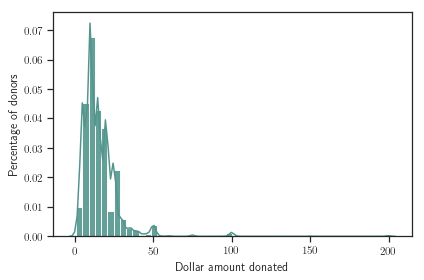

In [13]:
fig = sns.distplot(learning.loc[learning.TARGET_D > 0, 'TARGET_D'], bins=50, hist_kws={'alpha': 0.9}, color=Config.get("color_palette")[0])
plt.ylabel("Percentage of donors");
plt.xlabel("Dollar amount donated")
save_fig('target_distribution')

In [14]:
learning.loc[learning.TARGET_D > 0.0, 'TARGET_D'].median()

13.0

* The label is imbalanced, with roughly 95% / 5%
* Most donations are below 20 dollars. The median is 13 \$
* Spikes are visible for 5, 10, 15, 20, 25, 50, 100 and 200 $
* The distribution is right-skewed

Checking the claim from the documentation that donations are positively correlated with the time since the last donation. We plot the duration since the last gift against the donation amount for the current campaign. The marker size indicates the total amount an example has donated so far.

It is evident that from a lag of &geq; 15 months, donations increase indeed, and over the whole spectrum of amounts. We see a marked difference in 100- and 50 $ donations.

In [15]:
sns.scatterplot(x='LASTDATE_DELTA_MONTHS',y='TARGET_D', size='RAMNTALL', alpha=0.6, data=learning.loc[learning.TARGET_D > 0,:],
                palette=Config.get("color_palette_binary"))
plt.xlabel("Months passed without a donation before the current donation");
plt.ylabel("Amount donated, $");
save_fig(fig_id="donations_vs_time_since_last")

ValueError: Could not interpret input 'LASTDATE_DELTA_MONTHS'

### Socio-economic environment and label

Donations by living environment (C=City, R=Rural, S=Suburban, T=Town,U=Urban; lowest numbers represent highest socio-economic ranking). Major donors versus non-major donors.

Surprisingly, one of the top donations came from a rural region of low socio-economic status. Major donors that donated this time are not present in the lowest socio-economic environments.

In [20]:
learning.MAJOR

CONTROLN
95515     NaN
148535    NaN
15078     NaN
172556    NaN
7112      NaN
47784     NaN
62117     NaN
109359    NaN
75768     NaN
49909     NaN
106016    NaN
60127     NaN
85548     NaN
12890     NaN
134891    NaN
143689    NaN
64667     NaN
98090     NaN
35557     NaN
42556     NaN
82943     NaN
72675     NaN
190166    NaN
92152     NaN
82229     NaN
160963    NaN
89160     NaN
102610    NaN
122772    NaN
97870     NaN
         ... 
56972     NaN
22658     NaN
126131    NaN
93718     NaN
157506    NaN
31573     NaN
46748     NaN
139193    NaN
98104     NaN
23868     NaN
132458    NaN
17039     NaN
35112     NaN
104515    NaN
12322     1.0
131980    NaN
78831     NaN
29549     NaN
38061     NaN
109741    NaN
47945     NaN
84678     NaN
58178     NaN
156106    NaN
35088     NaN
184568    NaN
122706    NaN
189641    NaN
4693      NaN
185114    1.0
Name: MAJOR, Length: 95412, dtype: float64

/data/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


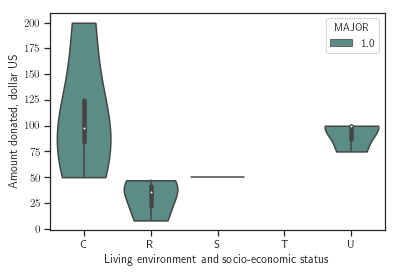

In [18]:
sns.violinplot(y="TARGET_D", x="DOMAINUrbanicity", hue='MAJOR',cut=0, data=learning.loc[learning.TARGET_D > 0,:],
               palette=Config.get("color_palette_binary"))
plt.xlabel("Living environment and socio-economic status");
plt.ylabel("Amount donated, dollar US");
#save_fig(fig_id="donations_vs_living_environment")

All-time donations by environment. The y- axis is in log scale. We see now that each socio-economic environment also harbours major donors.

In [ ]:
fig=sns.boxplot(y="RAMNTALL", x="DOMAIN", hue='MAJOR', data=learning,palette=Config.get("color_palette_binary"))
fig.set_yscale('log')
plt.xlabel("Living environment and socio-economic status");
plt.ylabel("Lifetime amount donated, $");
save_fig(fig_id="donations_vs_living_environment")

## Overview

A first, general look at the data structure:

In [ ]:
learning.info()

* There are 481 features (of which one is the index)
* A total of 95412 examples
* 24 categorical features, 53 datetime features, 48 numerical features with missing values, 297 integer features without missing values and 56 string features

In [ ]:
learning.head()

### Numerical Features

In [ ]:
numerical = learning.select_dtypes(include=np.number).columns
print("There are {:1} numerical features".format(len(numerical)))

### Skewness

In [ ]:
numeric_features = learning.select_dtypes(include=np.float64)
stat, p_agost = stats.normaltest(numeric_features,axis=0,nan_policy='omit')

In [ ]:
agost_skew = pd.DataFrame({'Feature': learning.select_dtypes(include=np.float64), 'DAgostino_stat': stat, 'DAgostino_pval': p_agost})

In [ ]:
skew = learning.select_dtypes(include=np.float64).apply(stats.anderson, axis=0).reset_index()

In [ ]:
learning.MBCRAFT.hist(bins=50)

In [ ]:
skew

In [ ]:
df_skewtest = pd.DataFrame({'Feature': learning.select_dtypes(include=np.float64).columns, 'Statistic': results_skewtest.statistic, 'P_val': results_skewtest.pvalue})

In [ ]:
df_skewtest.loc[df_skewtest.Statistic >0]

### Categorical Features

Categories were defined on import of the csv data. The categories were identified in the dataset dictionary.

In [ ]:
categories = learning.select_dtypes(include='category').columns
print(categories)

In [ ]:
learning.loc[:, categories].describe()

### Object Features

These features have mixed datatypes and are encoded as strings. This hints at noisy data and features that will have to be transformed before becoming usable.

In [ ]:
objects = learning.select_dtypes(include='object').columns
print(objects)

In [ ]:
learning.loc[:, objects].describe()

### Date features
These are imported as strings and will have to be transformed later on to become useful.

In [ ]:
dates = learning.loc[:, dl.date_features]
dates.describe()

### Correlations

Since there are so many features, we will plot those who have a significant correlation only.

In [ ]:
corr_all = learning.drop(['TARGET_B','TARGET_D'], axis=1).corr()

In [ ]:
mask_all = np.zeros_like(corr_all, dtype=np.bool)
mask_all[np.triu_indices_from(mask_all)] = True

sns.heatmap(corr_all,
            cmap=Config.get("color_map_diverging"), mask=mask_all, vmax=1.0, center = 0.0, square=True,
            linewidths = 0)

### Correlations between numerical features, excluding US census data

In [ ]:
data_exclude_census_numeric = learning[learning.columns.difference(dl.us_census_features)].select_dtypes(include=["float64"])

In [ ]:
data_exclude_census_corr = data_exclude_census_numeric[data_exclude_census_numeric.columns.difference(['TARGET_B','TARGET_D'])].corr()

In [ ]:
mask_census = np.zeros_like(data_exclude_census_corr, dtype=np.bool)
mask_census[np.triu_indices_from(mask_census)] = True

sns.heatmap(data_exclude_census_corr, mask=mask_census, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)

### Promotion history correlations

In [ ]:
prom_hist_f = list(donation_responses.columns)+list(multibytes.columns)+dl.promo_history_summary
promotion_history_features = learning.reindex(columns=prom_hist_f)
prom_hist_corr = promotion_history_features[promotion_history_features.columns.difference(['TARGET_B','TARGET_D'])].corr()

In [ ]:
mask_promo = np.zeros_like(prom_hist_corr, dtype=np.bool)
mask_promo[np.triu_indices_from(mask_promo)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(prom_hist_corr, mask=mask_promo, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)
save_fig(fig_id="correlations_promotion_giving_history")

### Giving history correlations

In [ ]:
giving_hist_f = list(donation_responses.columns) + dl.giving_history + dl.giving_history_summary +['LASTDATE_DELTA_MONTHS', 'MINRDATE_DELTA_MONTHS',
       'MAXRDATE_DELTA_MONTHS', 'MAXADATE_DELTA_MONTHS']
giving_history_features = learning.loc[:,giving_hist_f]
giving_corr = giving_history_features[giving_history_features.columns.difference(['TARGET_B','TARGET_D'])]

In [ ]:
mask_giving = np.zeros_like(giving_corr, dtype=np.bool)
mask_giving[np.triu_indices_from(mask_giving)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(giving_corr, mask=mask_giving, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)
save_fig(fig_id="correlations_giving_history")

### Puttting donors on a map

In [ ]:
num_donors_by_zip = learning[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('sum') # number of people who donated
num_members_by_zip = learning[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('count') # number of people who are registered at that ZIP
cum_donation_by_zip = learning[['ZIP', 'TARGET_D']].groupby('ZIP', as_index=False).agg('sum')
zip_states = learning[['ZIP','STATE']].drop_duplicates()

In [ ]:
data_by_zip = cum_donation_by_zip.merge(num_members_by_zip, on='ZIP').merge(zip_states, on='ZIP')
data_by_zip.columns = ["ZIP", "CumDonation", "MemberCount", "State"]

In [ ]:
def rel_donation(row):
    if row.CumDonation != 0.0:
        return row.CumDonation/(1.0 if row.MemberCount == 0.0 else row.MemberCount)
    else:
        return 0.0

data_by_zip['RelDonation'] = data_by_zip.apply(rel_donation,axis=1)

In [ ]:
from geopy.geocoders import Here
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

def do_geo_query(q):
    geolocator = Here(app_id="ZJBxigwxa1QPHlWrtWH6", app_code="OJBun02aepkFbuHmYn1bOg")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.01, max_retries=4)
    try:
        return geolocator.geocode(query=q, exactly_one=True)
    except GeocoderTimedOut:
        return do_geo_query(q)

def get_loc(example):
    if example.ZIP:
        zip = str(int(example.ZIP)).rjust(5, '0')
        q = {'postalcode': zip, 'state': example.State}
        return do_geo_query(q)
    else:
        return None
    
def extract_coords(location):
    return [location.latitude, location.longitude]

In [ ]:
import pickle
from tqdm import tqdm

tqdm.pandas()

try:
    zip_data = open("zip_data.pkl", "rb")
    locations = pickle.load(zip_data)
    zip_data.close()
except Exception as e:
    locations = data_by_zip.progress_apply(get_loc, axis=1)
    locations = pd.DataFrame(locations, columns="location")
    locations['ZIP'] = data_by_zip.ZIP
    zip_data = open("zip_data.pkl", "wb")
    pickle.dump(locations, zip_data)
    zip_data.close()


In [ ]:
data_by_zip = data_by_zip.merge(locations, on='ZIP')

In [ ]:
data_by_zip.loc[:,'longitude'] = data_by_zip.location.apply(lambda l: l.longitude if l != None else None)
data_by_zip.loc[:,'latitude'] = data_by_zip.location.apply(lambda l: l.latitude if l != None else None)

AA, AE and AP stand for armed services. ZIP codes don't work here, they point anywhere. Also, we only include locations where someone has actually donated by filtering on CumDonation.

In [ ]:
data_by_zip1 = data_by_zip.loc[data_by_zip.State != ['AA','AE','AP'],:]
data_by_zip2 = data_by_zip1.loc[data_by_zip1.CumDonation > 0.0,:]

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
fig = plt.figure(figsize=(20,16))

osm_terrain = cimgt.OSM()


ax = fig.add_subplot(1, 1, 1, projection=osm_terrain.crs)

ax.set_extent([-166, -65, 10, 65], crs=ccrs.PlateCarree())
ax.add_image(osm_terrain, 6)

lon = data_by_zip2.longitude
lat = data_by_zip2.latitude
mc = data_by_zip2.MemberCount
cd = data_by_zip2.CumDonation
rd = data_by_zip2.RelDonation

data_by_zip2.plot(kind="scatter",x="longitude",y="latitude",ax=ax,
                  s=cd, c=rd, label="Cumulative Donations",
                  legend=True, alpha=0.5, cmap=Config.get("color_map"),
                  subplots=True, colorbar=True, transform=ccrs.PlateCarree())
            
save_fig(fig_id="donations_geographical")
plt.show()

* Most donations come from the urban areas, especially San Francisco, Los Angeles, Miami, Chicago and Detroit. To a lesser extent, cities like Houston, Dallas, Minneapolis, Atlanta, Tampa, Seattle and Phoenix can be made out.
* Interestingly, the East Coast has not donated, despite featuring some large metropolitan areas like New York, Boston, or Washington

### Categorical features

In [ ]:
categories = learning.select_dtypes("category").copy()
target = categories['TARGET_D']
categories = categories.drop('TARGET_D', axis=1)
#categories['TARGET_B'] = learning.TARGET_B.astype("category")
#categories['TARGET_D'] = learning.TARGET_D
#categories_grouped = categories.groupby('TARGET_B')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
lm.fit(np.ndarray(categories),y=np.ndarray(target))

In [ ]:
pd.crosstab(categories.TARGET_D,[categories.INCOME],margins=True)

### The US census data

In [ ]:
census = learning[dl.us_census_features]
census_corr = census.corr()

In [ ]:
mask = np.zeros_like(census_corr, dtype=np.binary)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(census_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})
save_fig(fig_id="correlation_census")

In [ ]:
census.select_dtypes(include="int64")

### Income, Wealth and donations

In [ ]:
inc_targ = sns.violinplot(x="INCOME", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["INCOME","TARGET_D"]])
inc_targ.set_yscale('log')
plt.show()

In [ ]:
weal1_targ = sns.violinplot(x="WEALTH1", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["WEALTH1","TARGET_D"]])
weal1_targ.set_yscale('log')
plt.show()

In [ ]:
weal2_targ = sns.violinplot(x="WEALTH2", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["WEALTH2","TARGET_D"]])
weal2_targ.set_yscale('log')
plt.show()

In [ ]:
sns.catplot(x="WEALTH2", y="TARGET_D", hue="MAJOR",
            kind="violin", inner="stick", split=True, data=learning.loc[learning.TARGET_D > 0.0,:])

In [ ]:
sns.catplot(x="CLUSTER", y="TARGET_D", kind="box", data=learning)

In [ ]:
sns.distplot(learning.loc[learning.TARGET_D > 0.0,
                          'TARGET_D'], bins=50, kde=False, rug=True)

In [ ]:
learning.select_dtypes(include=np.float).hist(bins=50, figsize=(50, 50))
plt.show()
save_fig("float_feature_histograms")

### Boruta

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = learning.dropna(axis=1)
y = X['TARGET_D'].values
X = X.drop(['TARGET_B','TARGET_D'],axis=1)
cats = X.select_dtypes(include='category').columns
dummies = pd.get_dummies(X[cats])
X = X.drop(cats, axis=1)
X = X.merge(dummies,on=X.index).dropna().values

In [ ]:
X

In [ ]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='auto', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

# PCA

A first look at important features

In [ ]:
from sklearn import decomposition
from kdd98.transformers import *

In [ ]:
X = learning.drop(["TARGET_B", "TARGET_D", "TCODE"], axis=1)
X.info()

In [ ]:
X.select_dtypes(include="category").columns

In [ ]:
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot",  OneHotEncoder(impute_missing=True,use_cat_names=True,return_df=True))
])

categories_transformer = ColumnTransformer([
    ("cat_encoder",
     cat_pipe,
     list(X.select_dtypes(include="category").columns))
])

In [ ]:
cats = categories_transformer.fit_transform(X)

In [ ]:
print(list(categories_transformer.named_transformers_.cat_encoder.named_steps.one_hot.get_feature_names()))

In [ ]:
cats = pd.DataFrame(cats, columns = list(categories_transformer.named_transformers_.cat_encoder.named_steps.one_hot.get_feature_names()), index=X.index)

In [ ]:
X = X.merge(cats, on=X.index)

In [ ]:
X.drop(X.select_dtypes(include="category").columns,axis=1,inplace=True)

In [ ]:
X_centered = X - X.mean()

In [ ]:
X_centered = X_centered.dropna()

In [ ]:
X_centered[X.select_dtypes(include="object").columns] = X_centered[X.select_dtypes(include="object").columns].astype("float64")

In [ ]:
X_centered.describe()

In [ ]:
pca = decomposition.PCA()
pca.fit(X_centered,)
result = pd.DataFrame(pca.transform(X_centered), columns=[
                      "PCA%i" % i for i in range(n_comp)], index=X.index)